# Introduction to Data Science
## Homework 3

Student Name: Zian Jiang

Student Netid: zj444
***

### Part 1 (5 Points)
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

Answer: $$ \text{Information Gain} = H(Y)-H(Y|X) = -\sum_{Y}P(y)\log P(y) + \sum_{x}\sum_{y}p(x)p(y|x)\log p(y|x) = $$ $$\sum_{x}\sum_{y}p(x,y)\log p(y|x) - \sum_{y}(\sum_{x}p(x,y))\log P(y) = $$ $$\sum_{x}\sum_{y}p(x,y)\log p(y|x) - \sum_{y}\sum_{x}p(x,y)\log P(y) = $$ $$\sum_{y}\sum_{x}p(x,y)\log \frac{P(y|x)}{P(y)} = $$  $$\sum_{y}\sum_{x}p(x,y)\log \frac{P(y|x)P(x)}{P(x)P(y)} = \text{Mutual Information}$$

### Part 2 - Preparing a Training Set and Training a Decision Tree (10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function in numpy but DO NOT use the data splitting functions from Sklearn.

In [4]:
import pandas as pd
import numpy as np
# Code here
df = pd.read_csv("cell2cell_data.csv",names=["revenue","outcalls","incalls","months","eqpdays","webcap","marryyes","travel","pcown","credictd","retcalls","churndep"])
df.head()
N = len(df)
df['random_number'] = np.random.randn(N)

train = df[df['random_number'] <= 0.8].drop(labels="random_number",axis=1)
test = df[df['random_number'] > 0.8].drop(labels="random_number",axis=1)
train

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,credictd,retcalls,churndep
0,48.82,10.00,3.00,26,780,0,0,0,0,1,4,1
2,29.99,0.00,0.00,52,1441,0,0,0,1,1,3,1
3,51.42,0.00,0.00,36,59,1,0,0,0,0,4,1
4,37.75,2.67,0.00,25,572,0,0,0,1,1,3,1
5,5.00,0.00,0.00,26,785,1,0,0,0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
39853,185.30,178.67,171.00,41,44,1,1,0,1,1,0,0
39855,167.59,141.33,283.67,17,28,1,0,0,0,0,0,0
39856,151.49,128.67,175.33,47,9,1,1,0,0,1,0,0
39857,125.42,90.00,336.67,18,79,1,0,0,0,0,0,0


2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

do train/test split multiple times and take notes of df.describe() and check for noticeable changes. If there is no big changes then it means our sampling method is random.

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [5]:
# Code here
from sklearn.tree import DecisionTreeClassifier
Y = train['churndep']
X = train.drop('churndep', 1)

#instantiate the DT
clf = DecisionTreeClassifier(criterion = 'entropy')
#now fit the DT
clf.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!). Make sure the bar plot is sorted by increasing feature importance values.

Text(0, 0.5, 'relative importance')

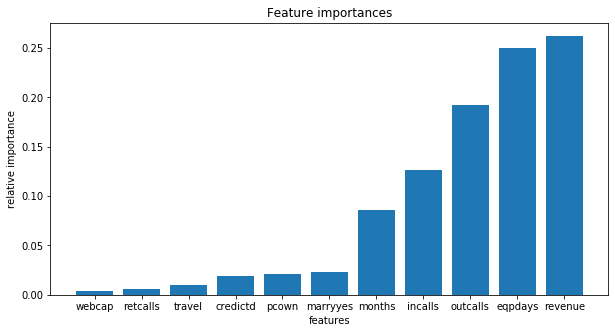

In [6]:
# Code here
import matplotlib.pyplot as plt
%matplotlib inline
feature_mi = clf.feature_importances_
plt.figure(figsize=(10,5))
df=pd.DataFrame({'variables':X.columns.values,'importances':feature_mi})
df.sort_values('importances',inplace=True)
plt.bar(df['variables'],df['importances'])
plt.title("Feature importances")
plt.xlabel("features")
plt.ylabel("relative importance")

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome? What "real-life" connection can you draw between each variable and churn? Make sure to state your answer, and not just show code.

In [9]:
train[["revenue","eqpdays",'outcalls']].corr()

,revenue,eqpdays,outcalls
revenue,1.000000,-0.225377,0.495748
eqpdays,-0.225377,1.000000,-0.247517
outcalls,0.495748,-0.247517,1.000000


In [11]:
revenue_churn = train[train['churndep'] == 1].groupby(["revenue"]).size()
eqpdays_churn = train[train['churndep'] == 1].groupby(["eqpdays"]).size()
outcalls_churn = train[train['churndep'] == 1].groupby(["outcalls"]).size()

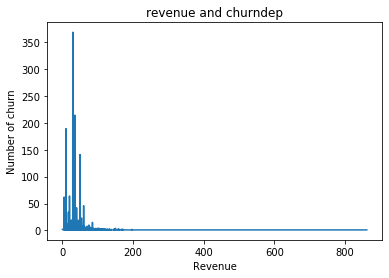

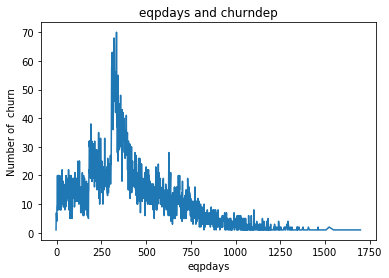

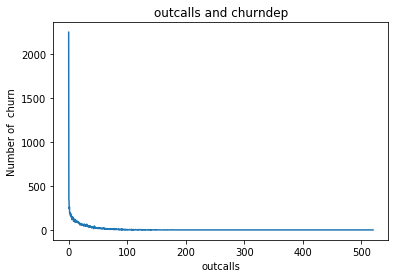

In [14]:
plt.plot(revenue_churn.keys(),revenue_churn.values)
plt.xlabel("Revenue")
plt.ylabel("Number of churn")
plt.title("revenue and churndep")
plt.show()
plt.plot(eqpdays_churn.keys(),eqpdays_churn.values)
plt.xlabel("eqpdays")
plt.ylabel("Number of  churn")
plt.title("eqpdays and churndep")
plt.show()
plt.plot(outcalls_churn.keys(),outcalls_churn.values)
plt.xlabel("outcalls")
plt.ylabel("Number of  churn")
plt.title("outcalls and churndep")
plt.show()

According to the correlation matrix, between "revenue", "eqpdays", and "outcalls", only between revenue and the outcalls is positive, the rest of the relastionships are negative.

Overall, all these variables have negative relationship with the chunrdep, which is the churn rate, since as they increase, churn rate decreases.

For revenue, we can see that churn happens mostly before 200, this may mean that for customers that generate less revenue for the company, they are more likely to switch brands. Loyal customers who make more money for the company are less likely to switch.

For the eqpdays variable, the churn rate increases before 400, and continuously drops after 400. This could mean that when the customers get their products at first, they are more likely to switch. Once they get used to it, for example after 400 days of having received it, they are less likely to switch brands.

For the outcalls variable, the churn rate decreases as the outcalls increases. In real life, this could mean that the company is providing a better service only for the people who make a lot of calls.



6\. Using the classifier built in 2.3, try predicting "churndep" on both the train_df and test_df data sets. What is the accuracy on each? What is your explanation on the difference (or lackthereof) between the two accuracies?

In [16]:
# Code here
Y_test = test['churndep']
X_test = test.drop('churndep', 1)
print("train accuracy: " + str(clf.score(X,Y)))
print("test accuracy: " + str(clf.score(X_test,Y_test)))
print("Since our model is trained on the training set, of course it is able to be nearly 100% accurate on the same training set. On the other hand, the model has not seen any data from the testing set and thus accuracy went down to only 53%, due to generalization. This means our model is not ideal because even random guessing would give us 50% accuracy")

train accuracy: 0.9998092027856393
test accuracy: 0.5259153590109368
Since our model is trained on the training set, of course it is able to be nearly 100% accurate on the same training set. On the other hand, the model has not seen any data from the testing set and thus accuracy went down to only 53%, due to generalization. This means our model is not ideal because even random guessing would give us 50% accuracy


### Part 3 - Finding a Good Decision Tree (10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [17]:
# Code here

min_samples_split_values = range(20,2000,200)
min_samples_leaf_values = range(5,101,10)
print(len(min_samples_split_values))
print(len(min_samples_leaf_values))

10
10


2\. Explain in words your reasoning for choosing the above ranges.

Since we have near 40k data, I want to see what would happen if I increase these default values to as large as 2000.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
ans = [[] for i in range(len(min_samples_leaf_values))]
# Code here
test_acc = [[] for i in range(len(min_samples_split_values))]
for i in range(len(min_samples_split_values)):
    for j in range(len(min_samples_leaf_values)):
        clf = DecisionTreeClassifier(criterion = 'entropy',min_samples_split=min_samples_split_values[i],min_samples_leaf=min_samples_leaf_values[j])
        clf.fit(X,Y)
        test_acc[j].append(clf.score(X_test,Y_test))

Text(0.5, 1.0, 'Test accuracy')

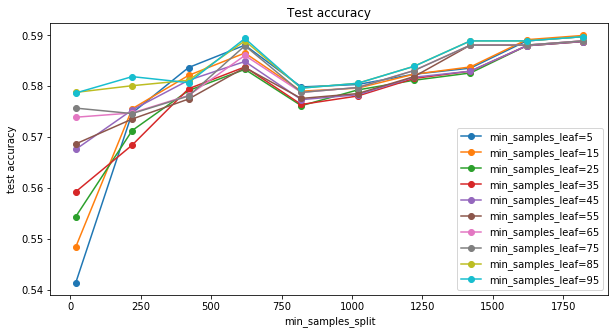

In [21]:
plt.figure(figsize=(10,5))
for i in range(len(test_acc)):
    plt.plot(min_samples_split_values,test_acc[i],"-o",label="min_samples_leaf="+str(min_samples_leaf_values[i]))
plt.legend()
plt.xlabel("min_samples_split")
plt.ylabel("test accuracy")
plt.title("Test accuracy")

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values), and reassess your answer in Q3.2.

In [23]:
# Code here
index = np.argmax(test_acc)
i = list(np.unravel_index(index,np.array(test_acc).shape))
print(np.max(test_acc))
print("best config: min_samples_split_values: {0}, min_samples_leaf_values: {1}".format(min_samples_split_values[i[1]],min_samples_leaf_values[i[0]]))

0.5899904897765097
best config: min_samples_split_values: 1820, min_samples_leaf_values: 15


5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

In a real business environment, having a predictive churn model gives you awareness and quantifiable metrics to fight against in your retention efforts. Having the ability to accurately predict future churn rates is necessary because it helps your business gain a better understanding of future expected revenue. Predicting churn rates can also help your business identify and improve upon areas where customer service is lacking.

Currenly in our decision tree model, though it is a white box model thus it is easy to visualize, the accuracy is not optimal and decision tree has the drawback of high variance. We can try to use other methods, depending on data availability, to further increase accuracy and low variance. Such as Random forests, SVM or AdaBoost.